# Water flux within the root 

## Model derivation


Roughly based on Roose and Fowler (2004) and Doussan et al. (2006)


The axial water flux in a xylem is given by 
\begin{eqnarray} 
q_z = - k_z \left( \frac{\partial p_r}{\partial z} - \rho g e_z \cdot v \right), \label{axialflux}
\end{eqnarray}
with units [L$^3$ T$^{-1}$] (see Eqn 3.1 Roose and Fowler, 2004). 
The parameter $k_z$ is the axial conductance [$L^5$ T M$^{-1}$], 
$p_r$ is the pressure inside the xylem [M L$^{-1}$ T$^{-2}$], 
$\rho$ is the density of water [M L$^{-3}$], 
$g$ is the gravitational acceleration [L T$^{-2}$], 
$e_z$ the downward unit vector [1],
and $v$ the normed direction of the xylem [1]. Thus Eqn \ref{axialflux} can be expressed as
\begin{eqnarray}
q_z = - k_z \left( \frac{\partial p_r}{\partial z} + \rho g v_3 \right), \label{axialflux2}
\end{eqnarray}
where $v_3$ is the $z$-component of the normed xylem direction. \\

\noindent
The radial flux is given by 
\begin{eqnarray}
q_r = - 2 a \pi l k_r (p_s - p_r) 
\end{eqnarray}
with units [L$^3$ T$^{-1}$] (based on Eqn 3.3 Roose and Fowler, 2004), 
where $a$ is the root radius [L], $l$ is the segments length [L], 
$k_r$ is the radial conductance [L$^2$ T M$^{-1}$], 
and $p_s$ is the pressure of the surrounding soil [M L$^{-1}$ T$^{-2}$]. \\

\noindent
The net flux is given by
\begin{eqnarray}
q = q_z + q_r,
\end{eqnarray} 
and mass conservation yields
\begin{eqnarray}
2 a \pi k_r (p_s - p_r) = - k_z \frac{\partial^2 p_r}{\partial z^2} \label{masscons}
\end{eqnarray}
(see Eqn 3.4 Roose and Fowler, 2004).

\noindent
For discretisation we use first Kirchhoff's law: In a graph that represents the root system for each node $i$ the sum of fluxes must be zero 
\begin{eqnarray}
\sum_{j \in N(i)} q_{ij} = 0,  \label{KH}
\end{eqnarray}
where $N(i)$ are the nodes that are connected to node $i$ and $q_{ij}$ is the net flux of the edge connecting node $i$ and node $j$.


## Benchmark 1: A single root in static soil 

For the first benchmark problem we assume a vertical single straight root segment surrounded by a soil with a constant soil pressure. 

For constant $k_r$ and $k_z$ we can solve Eqn \ref{masscons} yielding 
\begin{eqnarray}
p_r(z) := p_s + d_1 e^{\sqrt{c} z } + d_2 e^{-\sqrt{c} z} \label{analytic_flux}
\end{eqnarray} 
with $c = 2 a \pi k_r / k_z$. 

The constants $d_1$, and $d_2$ [M L$^{-1}$ T$^{-2}$] are calculated from the boundary conditions.

### Scenario 1: Dirichlet top and bot

Inserting $p_r(0)= p_0$, and $p_r(L)=p_L$ into Eqn \ref{analytic_flux}, leads to 

\begin{align}
\left(\begin{array}{cc}
  1 & 1  \\
  \exp{(\sqrt{c} L)} & \exp{(-\sqrt{c} L)} \\
\end{array}\right)
\left(\begin{array}{c}
  d_{1}  \\
  d_{2}  \\
\end{array}\right)
{} &= 
\left(\begin{array}{c}  
  p0-p_s \\
  p0-p_L \\
\end{array}\right)
\end{align}

Therefore the constants are given by
$ d = A^{-1} b $.

First some imports...

In [6]:
from math import *
import numpy as np
import matplotlib.pylab as plt

g = 9.8                  # gravitational acceleration (m/s^2)   
rho = 1.e3               # density of water, (kg/m^3)      
ref = 1.e5               # reference pressure (kg/ (m s^2))

def toPa(ph): # cm pressure head to Pascal (kg/ (m s^2))
    return ref - ph/100. * rho * g

def toHead(pa): # Pascal (kg/ (m s^2)) to cm pressure head
    return -(pa-ref) * 100 / rho / g

Next we pick the parameters

In [7]:
# Parameters
L = 0.5                # length of single straight root (m)
a = 2.e-3              # radius (m)
kz = 5.e-12            # axial conductivity (m^5 s / kg) (mal rho ergibt die alten einheiten)
kr = 2.e-9             # radial conductivity per root type (m^2 s / kg) 
p_s = toPa(-200)       # static soil pressure (cm) 
p0 = toPa(-1000)       # dircichlet bc at top
pL = toPa(-500)        # dircichlet bc at bot

# Analytical solution
c = 2*a*pi*kr/kz
p_r = lambda z: toHead( p_s + d[0]*exp(sqrt(c)*z) + d[1]*exp(-sqrt(c)*z) )

And finally, we calculate the constants $d_1$, and $d_2$, and plot the results

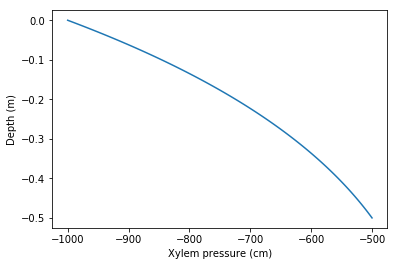

In [8]:
# Boundary conditions
AA = np.array([[1,1], [exp(-sqrt(c)*L), exp(sqrt(c)*L)] ]) # dirichlet top & bot
bb = np.array([p0-p_s, pL-p_s]) 
d = np.linalg.solve(AA, bb) # compute constants d_1 and d_2 from bc

# plot results
za_ = np.linspace(0,-L,100)
pr = list(map(p_r, za_))
plt.plot(pr,za_)
plt.xlabel("Xylem pressure (cm)")
plt.ylabel("Depth (m)")
plt.show()

### Scenario 2: Dirichlet top, Neumann bot

Inserting $p_r(0) = p_0$ as before, and $q_z(L) = 0$ (Eqn \ref{axialflux2}) leads to 
\begin{eqnarray}
\frac{\partial p_r}{\partial z}(L) = - \rho g v_3.
\end{eqnarray}
Using the analytical solution yields
\begin{eqnarray}
d_1 \sqrt{c} e^{\sqrt{c} L } - d_2 \sqrt{c} e^{-\sqrt{c} L}  = - \rho g v_3.
\end{eqnarray}


Therefore, we solve 
\begin{align}
\left(\begin{array}{cc}
  1 & 1  \\
 \sqrt{c} \exp{(\sqrt{c} L)} & -\sqrt{c} \exp{(-\sqrt{c} L)} \\
\end{array}\right)
\left(\begin{array}{c}
  d_{1}  \\
  d_{2}  \\
\end{array}\right)
{} &= 
\left(\begin{array}{c}  
  p0-p_s \\
  -\rho g \\
\end{array}\right)
\end{align}

We recalculate the constants $d_1$, and $d_2$, and plot the results

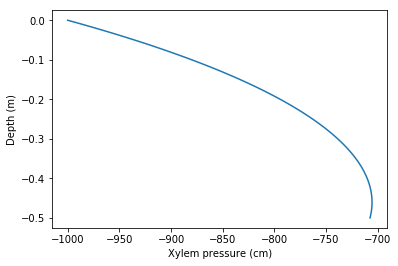

In [9]:
# Boundary conditions
AA = np.array([[1,1], [sqrt(c)*exp(-sqrt(c)*L), -sqrt(c)*exp(sqrt(c)*L)] ]) # dirichlet top, neumann bot
bb = np.array([p0-p_s, -rho*g]) #
d = np.linalg.solve(AA, bb) # compute constants d_1 and d_2 from bc

# plot results
za_ = np.linspace(0,-L,100)
pr = list(map(p_r, za_))
plt.plot(pr,za_)
plt.xlabel("Xylem pressure (cm)")
plt.ylabel("Depth (m)")
plt.show()

## Benchmark 2: A small root system in a static soil

In the following we will give a small static root system described by nodes and segments. For each segment we give its age and its type which is either 0 for tap root or 1 for lateral root

In [10]:
nodes = [ [0.00,0.00,3.00], [0.00,0.00,-3.00], [-0.00,-0.01,-3.48], [-0.85,0.48,-3.71], [-1.69,0.99,-3.90], [-2.58,1.32,-4.21], [-3.48,1.67,-4.49], [-4.38,2.00,-4.77], [-5.24,2.40,-5.09], [-6.08,2.82,-5.42], [-6.93,3.27,-5.69], [-6.96,3.29,-5.70], [-0.00,0.01,-3.97], [0.20,-0.95,-4.20], [0.43,-1.88,-4.49], [0.65,-2.81,-4.77], [0.84,-3.75,-5.06], [1.04,-4.70,-5.31], [1.27,-5.64,-5.54], [1.43,-6.58,-5.84], [1.48,-6.91,-5.94], [-0.01,0.03,-4.45], [0.75,0.68,-4.48], [1.52,1.32,-4.50], [2.30,1.94,-4.46], [3.07,2.58,-4.41], [3.88,3.16,-4.46], [4.73,3.69,-4.50], [5.34,4.05,-4.53], [-0.03,0.06,-4.97], [-0.73,0.63,-5.40], [-1.46,1.20,-5.79], [-2.15,1.80,-6.18], [-2.76,2.48,-6.59], [-3.16,3.16,-7.21], [-3.63,3.90,-7.64], [-0.06,0.07,-5.42], [0.07,1.04,-5.61], [0.23,2.00,-5.82], [0.46,2.93,-6.11], [0.72,3.85,-6.40], [0.99,4.77,-6.69], [1.06,5.11,-6.78], [-0.10,0.08,-5.96], [0.35,0.90,-6.31], [0.80,1.72,-6.65], [1.23,2.55,-7.01], [1.62,3.41,-7.34], [1.70,3.58,-7.41], [-0.14,0.10,-6.46], [0.05,-0.81,-6.83], [0.29,-1.72,-7.18], [0.43,-2.62,-7.59], [0.50,-3.12,-7.84], [-0.19,0.12,-7.02], [0.32,0.98,-7.03], [0.82,1.84,-6.95], [1.07,2.23,-6.88], [-0.23,0.17,-7.56], [0.68,-0.18,-7.80], [1.12,-0.35,-7.93], [-0.24,0.21,-8.14], [-0.01,0.36,-8.22], [-0.25,0.24,-8.69], [-0.24,0.25,-9.25], [-0.24,0.26,-9.71], [-0.26,0.26,-10.09], [-0.28,0.25,-10.57], [-0.26,0.24,-11.05], [-0.26,0.21,-11.58], [-0.25,0.19,-12.06], [-0.25,0.17,-12.55], [-0.23,0.15,-13.00], [-0.23,0.12,-13.46], [-0.22,0.12,-13.99], [-0.21,0.15,-14.54], [-0.19,0.20,-15.07], [-0.17,0.24,-15.60], [-0.17,0.31,-16.17], [-0.15,0.36,-16.64], [-0.12,0.43,-17.18], [-0.11,0.48,-17.70], [-0.07,0.52,-18.23], [-0.06,0.53,-18.53] ]
seg = [ [1,2], [2,12], [12,21], [21,29], [29,36], [36,43], [43,49], [49,54], [54,58], [58,61], [61,63], [63,64], [64,65], [65,66], [66,67], [67,68], [68,69], [69,70], [70,71], [71,72], [72,73], [73,74], [74,75], [75,76], [76,77], [77,78], [78,79], [79,80], [80,81], [81,82], [82,83], [2,3], [3,4], [4,5], [5,6], [6,7], [7,8], [8,9], [9,10], [10,11], [12,13], [13,14], [14,15], [15,16], [16,17], [17,18], [18,19], [19,20], [21,22], [22,23], [23,24], [24,25], [25,26], [26,27], [27,28], [29,30], [30,31], [31,32], [32,33], [33,34], [34,35], [36,37], [37,38], [38,39], [39,40], [40,41], [41,42], [43,44], [44,45], [45,46], [46,47], [47,48], [49,50], [50,51], [51,52], [52,53], [54,55], [55,56], [56,57], [58,59], [59,60], [61,62] ]
age = [ 7.76,7.52,7.29,7.03,6.80,6.53,6.28,6.00,5.73,5.43,5.16,4.87,4.64,4.44,4.20,3.95,3.68,3.43,3.17,2.94,2.70,2.42,2.14,1.85,1.57,1.27,1.02,0.73,0.45,0.16,-0.00,2.29,2.02,1.74,1.43,1.11,0.77,0.41,0.01,0.00,2.04,1.77,1.48,1.18,0.85,0.51,0.14,0.00,1.78,1.51,1.22,0.92,0.60,0.26,0.00,1.51,1.24,0.96,0.66,0.34,0.00,1.28,1.01,0.73,0.43,0.12,0.00,0.97,0.69,0.39,0.07,0.00,0.72,0.45,0.17,0.00,0.41,0.14,0.00,0.13,0.00,0.00 ]
types = [ 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2 ]

We can visualize the small root system by the following script, where colors denote the root type:

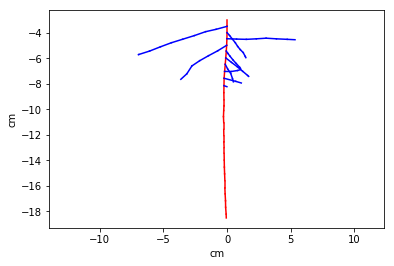

In [13]:
cols = ['r','b'] 
for i,s in enumerate(seg): 
    n1 = nodes[s[0]]
    n2 = nodes[s[1]]
    plt.plot([n1[0], n2[0]], [n1[2], n2[2]], cols[types[i]-1])    
plt.axis('equal')
plt.xlabel("cm")
plt.ylabel("cm")
plt.show()

TODO: we have to fix the rest of the parameters with reasonable data. kr and kz age dependent? dirichlet top, neumann at the tips?

TO DISCUSS: Actually, I can not think of anymore benchmarks concerning flux within the root system only. Since the flux model is static, root growth does not give any more information regarding the flux codes (or am i missing something).

## Comparison to numerical solutions

We plan to validate various numerical codes by solving the benchmarking problems. In the following we link to notebooks, containing these comparisons

* [Homegrown Python Code from Schnepf et al. ](Xylem flux - Python code.ipynb)
* TODO Dumux


## References

Doussan, C., Pierret, A., Garrigues, E., and Pages, L. (2006). Water uptake by plant roots: II - Modelling of water transfer in the soil root-system with explicit account of flow within the root system - comparison with experiments. *Plant and Soil*, 283(1-2):99–117.

Roose, T. and Fowler, A. C. (2004). A model for water uptake by plant roots. *Journal of Theoretical Biology*, 228(2):155–171.

Schnepf, A., Leitner, D., Landl, M., Lobet, G., Mai, T.H., Morandage S., Sheng, C., Zoerner, M., Vanderborght, J., Vereecken, H. (accepted) CRootBox: a structural-functional modelling framework for root systems. *Annals of Botany*
